In [38]:
import pandas as pd
df = pd.read_csv("Dhaka Rent.csv",sep=';')

df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [40]:
df.shape ##to check row and columns

(60, 2)

In [44]:
df.info() #check info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [45]:
#missing value checking
df.isnull().sum()

area    0
rent    0
dtype: int64

In [48]:
#to access specific columns
df['area'].head()   ## [] - means 1D and [[]] - means 2D

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [51]:
df[['rent']].head() #2D

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [54]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


Text(0.5, 1.0, 'Dhaka Rent Analysis')

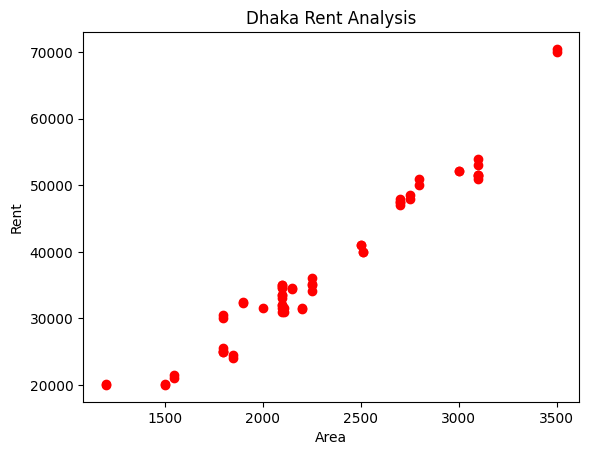

In [65]:
from matplotlib import pyplot as plt
plt.scatter(df['area'],df['rent'], color='red')   #to set data set in (X,Y)axis - first Arg is X-axis, second arg is Y-Axis and color
plt.xlabel('Area') #to set name on X axis
plt.ylabel("Rent") #to set name on Y axis
plt.title('Dhaka Rent Analysis') #to give title of the plot

## <b>Linear Regression step - 01

## Manual Calculation

In [158]:
x = df['area'] # x is area and input variable 
y = df['rent'] # y is rent which is output 

In [159]:
x_mean = x.mean()  #mean means total sum divided by N
x_mean    #raw calculation - without numpy 

2289.0

In [160]:
y_mean = y.mean()  #raw calculation - without numpy    
y_mean

37269.166666666664

### Using numpy

In [161]:
import numpy as np

In [162]:
np.mean(x)

2289.0

In [163]:
np.mean(y)

37269.166666666664

### Equations for Slope/coefficient and 
## Equation - 1
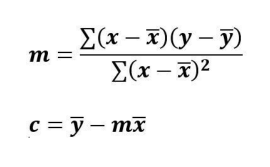

## Equation - 2
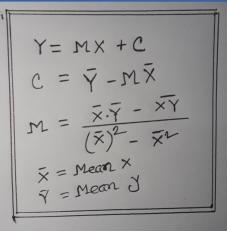
̄

### Deviation


In [102]:
dev_x = x - np.mean(x)
dev_y = y - np.mean(y)


### Calculating Slope

In [168]:
M = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
M

21.292661473611954

### Calculating Intercept

In [169]:
C = np.mean(y) - M * np.mean(x)
C 

-11469.7354464311

### Formula of simple linear Regression
#### Y = MX + C

### Now lets predict!!!

In [170]:

Y = M * 2000 + C

In [171]:
Y

31115.58750079281

## Using sklearn

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
reg = LinearRegression()

In [182]:
reg.fit(df[['area']] , df[['rent']]) #training

LinearRegression()

In [183]:
reg.coef_

array([[21.29266147]])

In [184]:
reg.intercept_

array([-11469.73544643])

In [98]:
reg.predict([[2000]])

C:\Users\rashe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31115.58750079]])

In [100]:
df['predicted_rent'] = reg.predict(df[['area']])
df['residuals'] = df['rent'] - df['predicted_rent']

In [96]:
df.head()

,area,rent,predicted_rent,residulas,residuals
0,2000,31500,31115.587501,384.412499,384.412499
1,2100,35000,33244.853648,1755.146352,1755.146352
2,2500,41050,41761.918238,-711.918238,-711.918238
3,2250,36100,36438.752869,-338.752869,-338.752869
4,3000,52100,52408.248974,-308.248974,-308.248974


In [309]:
#mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['rent'], df['predicted_rent'])

In [310]:
mse

6778077.204095561

In [312]:
#mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['rent'], df['predicted_rent'])

In [313]:
mae

2009.8695093576282

In [314]:
#RMSE
import math
math.sqrt(mse)

2603.474064417689

Text(0.5, 1.0, 'Dhaka Rent Analysis')

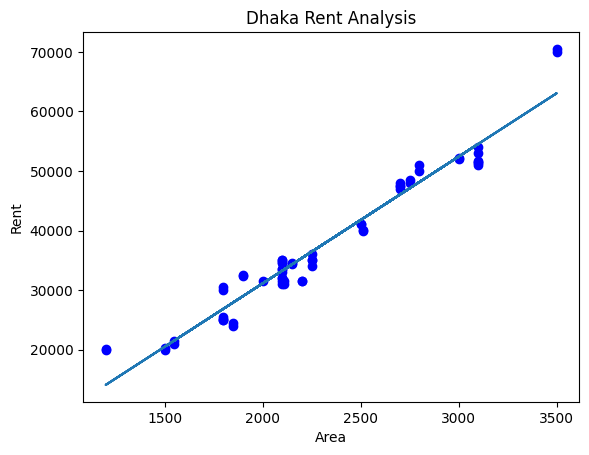

In [97]:
#BEST FIT LINE
plt.plot(x, df['predicted_rent'])
from matplotlib import pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')

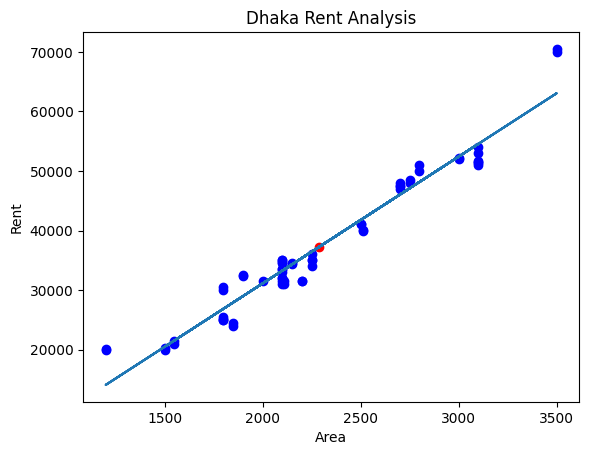

In [320]:
#BEST FIT LINE
plt.plot(x, df['predicted_rent'])
from matplotlib import pyplot as plt
plt.scatter(df['area'], df['rent'], color='blue')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')
plt.scatter(np.mean(x),np.mean(y),color="red")